# Machine Learning with Support Vector Machines and Parameter Tuning
In this short micro-project, we'll work on classifying flowers from the famous Iris data set into different categories.

In [1]:
#This is to install required modules
import piplite
await piplite.install('seaborn')
await piplite.install('scipy')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

## Data
Fisher's Iris data set is a multivariate data set introduced by Sir Ronald Fisher in the 1936 as an example of discriminant analysis.

The iris dataset contains measurements for 150 iris flowers from three different species.

The three classes in the Iris dataset:

    Iris-setosa (n=50)
    Iris-versicolor (n=50)
    Iris-virginica (n=50)

The four features of the Iris dataset:

    sepal length in cm
    sepal width in cm
    petal length in cm
    petal width in cm

The dataset is built into seaborn, so we can use the library to import the data.

In [3]:
iris = pd.read_csv('../data/iris.csv')

## Exploratory Analysis
Let's check out the dataset.

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,se
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


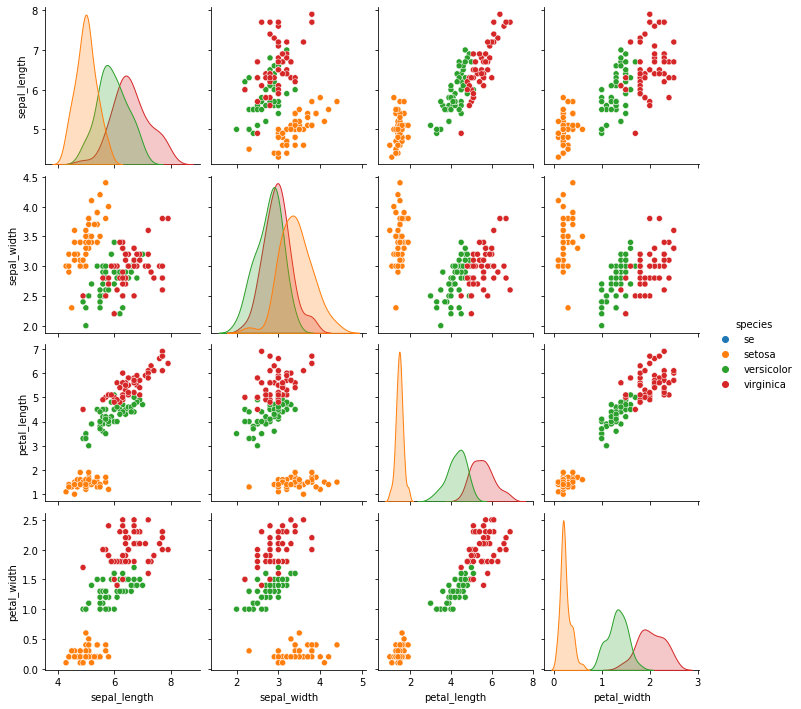

In [5]:
sns.pairplot(iris,hue='species')

A quick look at the pairplot, and we can see that the setosa species seems to be the most separable of the three.

## Model Building
We'll begin by splitting the data into training and test sets.

In [6]:
from sklearn.model_selection import train_test_split

X = iris.drop('species',axis=1)

y = iris['species']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

Now its time to train a Support Vector Machine Classifier.

In [7]:
from sklearn.svm import SVC

sv = SVC()

sv.fit(X_train,y_train)

SVC()

## Predictions and Evaluations

In [8]:
preds = sv.predict(X_test)

In [9]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,preds))

[[17  0  0]
 [ 0 16  3]
 [ 0  0  9]]


In [10]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       1.00      0.84      0.91        19
   virginica       0.75      1.00      0.86         9

    accuracy                           0.93        45
   macro avg       0.92      0.95      0.92        45
weighted avg       0.95      0.93      0.94        45



And it seems like our model did pretty well!

We can try and improve the results by tuning the parameters for the classifier. Scikit's inbuilt 'GridSearch' module lets us do that automatically, to an extent. Let's try and use that.

## Parameter Tuning using GridSearch

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
#Defining the initial parameter grid to search in
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]}

In [13]:
grid = GridSearchCV(SVC(),param_grid,refit=True)
grid.fit(X_train,y_train)

/lib/python3.10/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]})

### New Predictions and Results

In [14]:
grid_predictions = grid.predict(X_test)

print(confusion_matrix(y_test,grid_predictions))

[[17  0  0]
 [ 0 16  3]
 [ 0  0  9]]


In [15]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       1.00      0.84      0.91        19
   virginica       0.75      1.00      0.86         9

    accuracy                           0.93        45
   macro avg       0.92      0.95      0.92        45
weighted avg       0.95      0.93      0.94        45



A little better this time, with only one point that we weren't able to grab. This might be a good thing in real world applications as we don't want a model that overfits to the taining set completely.

This concludes our project!